In [2]:
import pandas as pd
import glob
from google.colab import files

# CSV files to Colab's content directory
files.upload()

# Define the path pattern to find all CSV files in content folder
path = "/content/Australia.csv"

# List all file paths matching the pattern
csv_files = glob.glob(path)

# Print the files found (optional but helpful to verify)
print("CSV files:")
for file in csv_files:
    print(file)

# Read and concatenate all CSVs into a single DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Display basic info to ensure concatenation
print("\nConcatenated DataFrame Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())



Saving Australia.csv to Australia.csv
Saving Bahrain.csv to Bahrain.csv
Saving Canada.csv to Canada.csv
Saving China.csv to China.csv
Saving Japan.csv to Japan.csv
Saving Miami.csv to Miami.csv
Saving Monaco.csv to Monaco.csv
Saving Saudi.csv to Saudi.csv
CSV files:
/content/Australia.csv

Concatenated DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5970 entries, 0 to 5969
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        5964 non-null   object 
 1   published_at  4887 non-null   object 
 2   updated_at    4887 non-null   object 
 3   like_count    4887 non-null   float64
 4   text          4887 non-null   object 
dtypes: float64(1), object(4)
memory usage: 233.3+ KB
None

First few rows:
                     author          published_at            updated_at  \
0  @GENOS-CyborgDestructive  2024-10-27T21:51:57Z  2024-10-27T21:51:57Z   
1          @federicoeiriz42  2024-10-21T22:27:5

In [3]:
# Define keywords for filtering comments
keywords = ["Max", "Verstappen", "Lando", "Norris", "Charles", "Leclerc", "Carlos", "Sainz", "Oscar", "Piastri", "Red Bull", "McLaren", "Ferrari", "race", "lap", "overtake", "collision", "Penalty", "FIA"]
# Filter comments containing any of the keywords
df['relevant'] = df['text'].astype(str).apply(lambda x: any(word.lower() in x.lower() for word in keywords))
relevant_comments = df[df['relevant']]

print(relevant_comments.head())


              author          published_at            updated_at  like_count  \
2        @Gusest2676  2024-10-18T10:05:35Z  2024-10-18T10:05:35Z         0.0   
3        @Gusest2676  2024-10-18T10:05:30Z  2024-10-18T10:05:30Z         0.0   
8   @yassineoumhamed  2024-10-08T08:03:12Z  2024-10-08T08:03:12Z         0.0   
12        @MrShikaga  2024-08-27T14:27:29Z  2024-08-27T14:27:29Z         1.0   
16      @kalisqx9018  2024-08-16T16:53:03Z  2024-08-16T16:53:03Z         1.0   

                                                 text  relevant  
2   <a href="https://www.youtube.com/watch?v=9z8sE...      True  
3   <a href="https://www.youtube.com/watch?v=9z8sE...      True  
8                   شكرا fia على الاهتمام بهذه القارة      True  
12  Interesting… Verstappen’s retirement looks a l...      True  
16  Carlos in his villain era, did you hear that l...      True  


In [4]:
# Sort relevant comments by 'like_count' in descending order and pick the top 10
top_comments = relevant_comments.nlargest(10, 'like_count')[['author', 'text', 'like_count']]
print("Top 10 Most Liked Comments:\n", top_comments)


Top 10 Most Liked Comments:
                      author  \
5846       @AMX_1790.POTATO   
5944         @versiable8041   
5449      @glandelfield3273   
5903       @kinokonoyama764   
1759        @notsobigcheese   
5006      @murderersrow7709   
3045           @DollyBuilds   
542             @KiethKrazy   
5870  @captainemergency7477   
2105            @StephenLMW   

                                                   text  like_count  
5846  Fun fact: in the last 2 non verstappen wins, C...     49256.0  
5944  Sainz losing his Appendix is the best thing to...     20196.0  
5449  Ferrari replacing Sainz with Hamilton is just ...     12979.0  
5903  Only Sainz has defeated the unbeaten Red Bull ...      6214.0  
1759  i love the part where Sainz goes full Mario Ka...      3749.0  
5006  Vettel retired at the 2014 Australian GP, brin...      3235.0  
3045  Ferrari ditching Sainz has turned him into a m...      3005.0  
542   Ever since Ferrari fired Sainz he&#39;s been o...      2806.0  

In [5]:
!pip install nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=8ad12f95c9b226841f433d3cdb9e6326f06bf1b08ce37c9de42185e27ecb2509
  Stored in directory: /root/.cache/pip/wheels/d2/10/44/6abfb1234298806a145fd6bcaec8cbc712e88dd1cd6cb242fa
Successfully built nrclex


In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')
nltk.download('wordnet')
nltk.download('movie_reviews')
nltk.download('conll2000')
nltk.download('twitter_samples')

from textblob import TextBlob

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


In [7]:
from nrclex import NRCLex

# Function to get emotions from a text
def get_emotions(text):
    emotions = NRCLex(text).raw_emotion_scores
    return emotions

# Apply emotion extraction and store in a new column
relevant_comments['emotions'] = relevant_comments['text'].apply(get_emotions)

# Example to show the results
print(relevant_comments[['text', 'emotions']].head())


                                                 text  \
2   <a href="https://www.youtube.com/watch?v=9z8sE...   
3   <a href="https://www.youtube.com/watch?v=9z8sE...   
8                   شكرا fia على الاهتمام بهذه القارة   
12  Interesting… Verstappen’s retirement looks a l...   
16  Carlos in his villain era, did you hear that l...   

                                             emotions  
2                                 {'anticipation': 1}  
3                                 {'anticipation': 1}  
8                                                  {}  
12  {'anticipation': 2, 'fear': 1, 'joy': 1, 'nega...  
16  {'fear': 1, 'negative': 1, 'joy': 1, 'positive...  


<ipython-input-7-d391e2d77cfd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_comments['emotions'] = relevant_comments['text'].apply(get_emotions)


            positive  negative  anger  joy  sadness  surprise
Verstappen       210       154     56  120       96        90
Norris            19        16      7    7        9         4
Leclerc           50        46     19   20       28        18
Sainz            342       261    105  177      198       134
Piastri           27        19     10    8       12         6


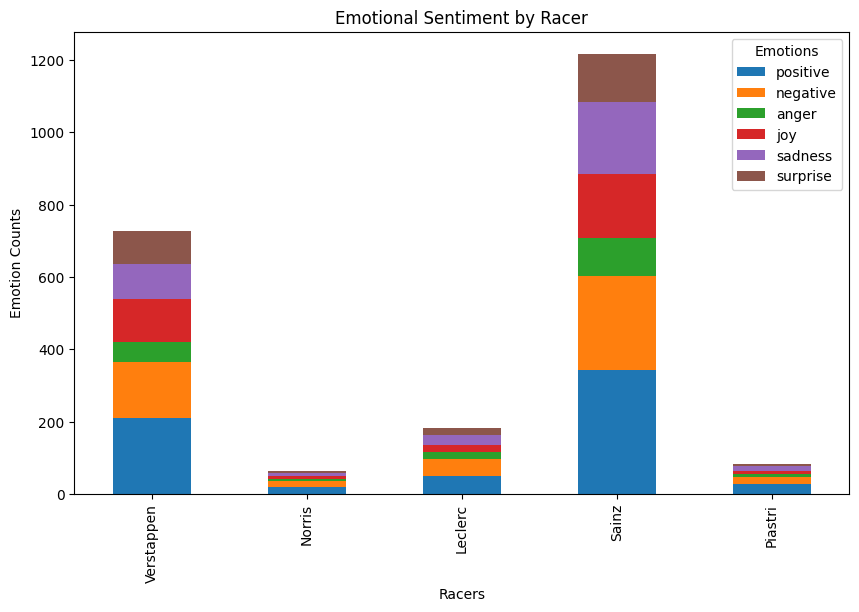

In [8]:
racers = ["Verstappen", "Norris", "Leclerc", "Sainz", "Piastri"]
emotion_summary = {racer: {'positive': 0, 'negative': 0, 'anger': 0, 'joy': 0, 'sadness': 0, 'surprise': 0}
                   for racer in racers}

for index, row in relevant_comments.iterrows():
    for racer in racers:
        if racer.lower() in row['text'].lower():
            emotions = row['emotions']
            for emotion in emotion_summary[racer].keys():
                emotion_summary[racer][emotion] += emotions.get(emotion, 0)

# Convert summary of the comments to DataFrame for visualization
emotion_df = pd.DataFrame.from_dict(emotion_summary, orient='index')
print(emotion_df)

# Plotting the data
import matplotlib.pyplot as plt

emotion_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Emotional Sentiment by Racer")
plt.xlabel("Racers")
plt.ylabel("Emotion Counts")
plt.legend(title="Emotions")
plt.show()


In [16]:
import pandas as pd

# list of racer names
racers = ['Verstappen', 'Norris', 'Leclerc', 'Piastri', 'Sainz']  # Replace with actual racer names

# identify racers mentioned in each comment, handling NaN values
def identify_racer(text):
    if isinstance(text, str):  # Only process if text is a string
        mentioned_racers = [racer for racer in racers if racer.lower() in text.lower()]
        return mentioned_racers[0] if mentioned_racers else None
    return None

# Apply the function to the 'text' column and create a new 'racer' column
df['racer'] = df['text'].apply(identify_racer)

# Filter out comments without racer mentions
df = df.dropna(subset=['racer'])


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to map sentiment scores to emotions
def get_emotion(text):
    score = sia.polarity_scores(text)

    if score['compound'] >= 0.6:
        return 'joy'
    elif score['compound'] >= 0.2:
        return 'surprise'
    elif score['compound'] > -0.2:
        return 'neutral'
    elif score['compound'] > -0.6:
        return 'sad'
    else:
        return 'anger'


df['emotion'] = df['text'].apply(get_emotion)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


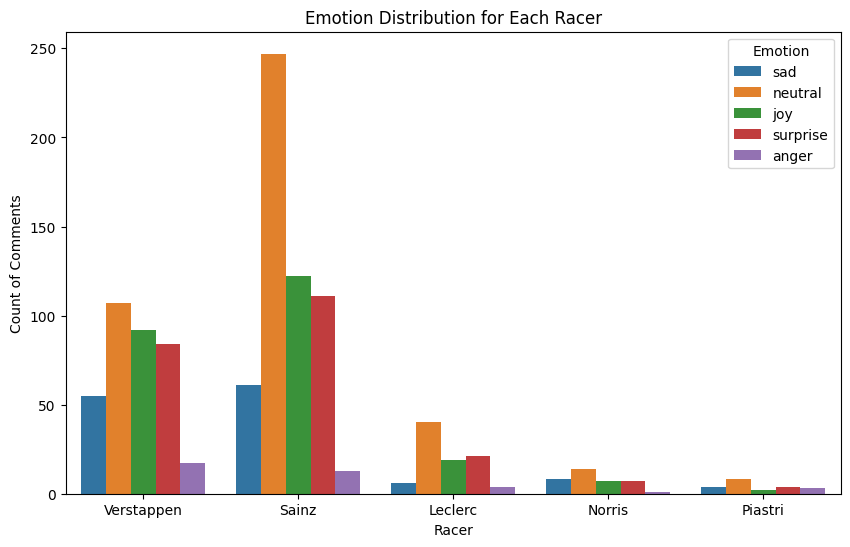

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='racer', hue='emotion')
plt.title("Emotion Distribution for Each Racer")
plt.xlabel("Racer")
plt.ylabel("Count of Comments")
plt.legend(title="Emotion")
plt.show()


<Figure size 1000x600 with 0 Axes>

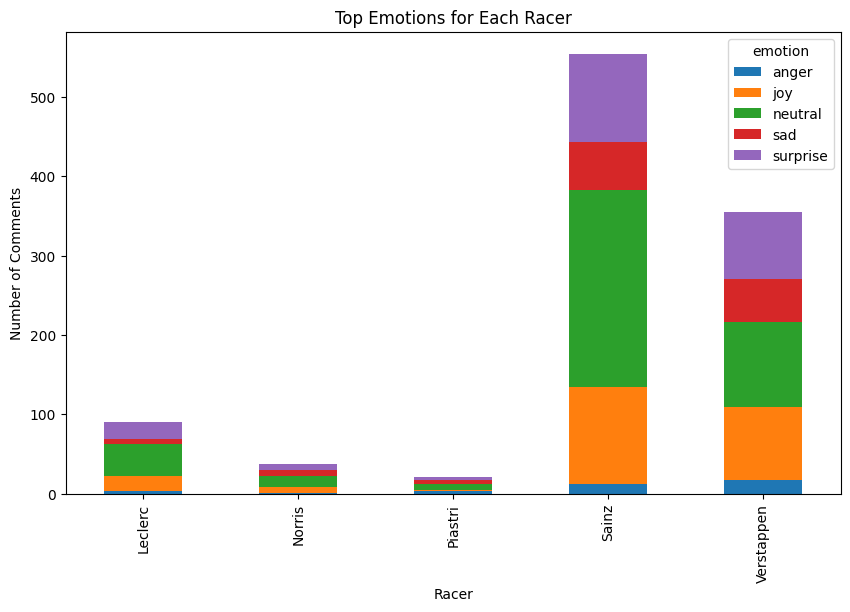

In [28]:
plt.figure(figsize=(10, 6))
emotion_counts = df.groupby(['racer', 'emotion']).size().unstack(fill_value=0)
emotion_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Top Emotions for Each Racer")
plt.xlabel("Racer")
plt.ylabel("Number of Comments")
plt.show()


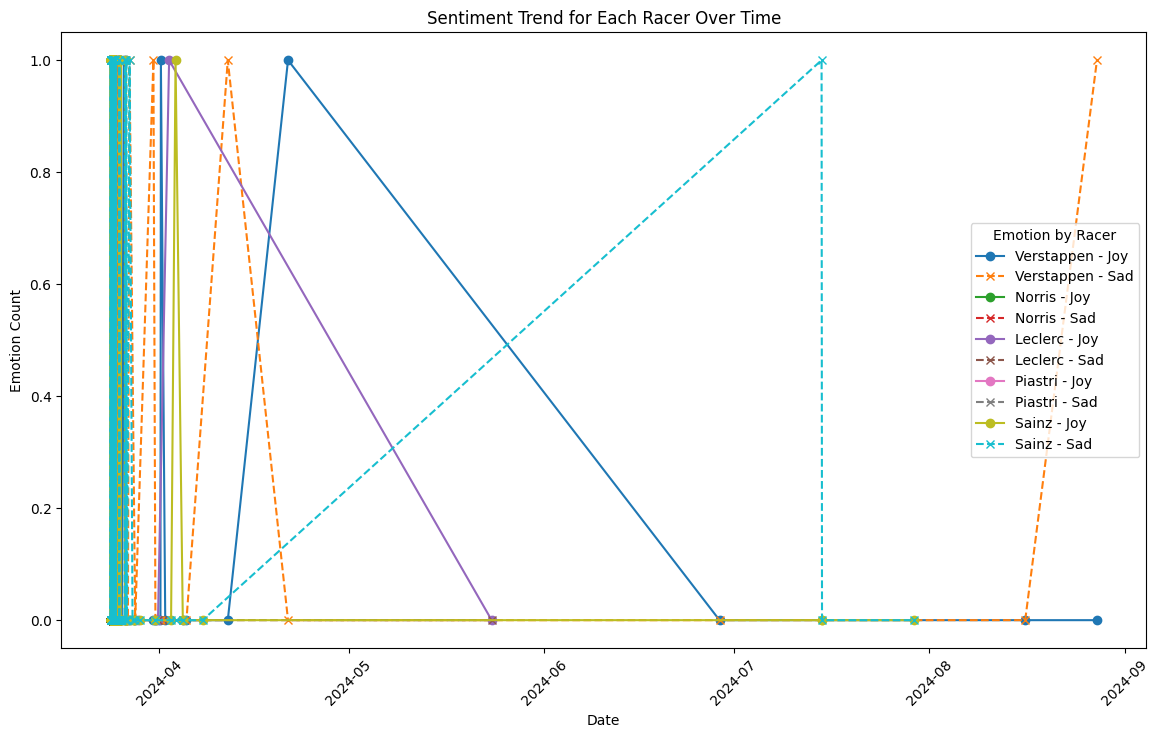

In [29]:

df['published_at'] = pd.to_datetime(df['published_at'])

sentiment_over_time = df.groupby(['published_at', 'racer', 'emotion']).size().unstack(fill_value=0).reset_index()


plt.figure(figsize=(14, 8))
for racer in racers:
    racer_data = sentiment_over_time[sentiment_over_time['racer'] == racer]
    plt.plot(racer_data['published_at'], racer_data['joy'], label=f"{racer} - Joy", linestyle='-', marker='o')
    plt.plot(racer_data['published_at'], racer_data['sad'], label=f"{racer} - Sad", linestyle='--', marker='x')


plt.xlabel('Date')
plt.ylabel('Emotion Count')
plt.title("Sentiment Trend for Each Racer Over Time")
plt.legend(title="Emotion by Racer", loc='best')
plt.xticks(rotation=45)
plt.show()


<ipython-input-30-d119988dcebb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_positive_racers.index, y=top_positive_racers.values, palette="viridis")


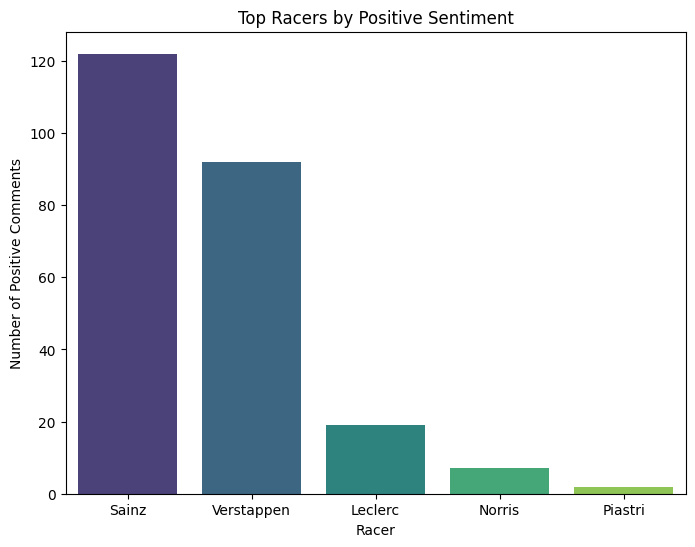

In [30]:
top_positive_racers = df[df['emotion'] == 'joy']['racer'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_positive_racers.index, y=top_positive_racers.values, palette="viridis")
plt.title("Top Racers by Positive Sentiment")
plt.xlabel("Racer")
plt.ylabel("Number of Positive Comments")
plt.show()
